# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tejaspatel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load .env enviroment variables
load_dotenv(dotenv_path='api.env')

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])



In [3]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 7660


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Gian M. Volpicelli',
 'title': 'The Rise and Fall of a Bitcoin Mining Sensation',
 'description': 'Compass Mining grew quickly during crypto’s halcyon days. Now, its customers and their thousands of mining machines are stuck.',
 'url': 'https://www.wired.com/story/compass-mining-bitcoin-russia/',
 'urlToImage': 'https://media.wired.com/photos/62e9c5e1d7368105da057de3/191:100/w_1280,c_limit/BitRiver-Mining-Center-Rise-And-Fall-Of-Bitcoin-Mining-Business-1184520941.jpg',
 'publishedAt': '2022-08-03T11:00:00Z',
 'content': "It was 8:45 in the morning of June 13 when Bill Stewart, the CEO of Maine-based bitcoin mining business Dynamics Mining, received a call from one of his employees. He's like, Every machine inside of … [+3472 chars]"}

In [4]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 4853


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Gian M. Volpicelli',
 'title': "Ethereum's 'Merge' Is a Big Deal for Crypto—and the Planet",
 'description': 'One of the most influential cryptocurrency projects is set to finally ditch proof-of-work mining.',
 'url': 'https://www.wired.com/story/ethereum-merge-big-deal-crypto-environment/',
 'urlToImage': 'https://media.wired.com/photos/62fe63bcfd602ff2f11e6fbf/191:100/w_1280,c_limit/Ethereum-Ditches-Crypto-Business-1036181110.jpg',
 'publishedAt': '2022-08-18T16:09:33Z',
 'content': 'Cryptocurrencies are often criticized for being bad for the planet. Every year, bitcoin mining consumes more energy than Belgium, according to the University of Cambridges Bitcoin Electricity Consump… [+3829 chars]'}

In [5]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.5574,0.119,0.000,0.881,It was 8:45 in the morning of June 13 when Bil...
1,0.0000,0.000,0.000,1.000,"Tools to trace cryptocurrencies have, over jus..."
2,0.5994,0.130,0.034,0.835,You gotta hand it to some people for being imp...
3,-0.5584,0.068,0.170,0.763,Cryptocurrencies are often criticized for bein...
4,0.2023,0.053,0.000,0.947,Elon Musk-owned electric vehicle making compan...


In [6]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.5584,0.068,0.170,0.763,Cryptocurrencies are often criticized for bein...
1,-0.0217,0.048,0.051,0.901,The non-fungible token\r\n (NFT) market has fa...
2,-0.2732,0.059,0.115,0.827,"It's a day of the week ending in the letter ""y..."
3,-0.1531,0.000,0.045,0.955,"Less than two weeks into its soft launch, Game..."
4,0.2023,0.048,0.000,0.952,"The Ethereum Merge is significant, and not jus..."


In [7]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.047564,0.066060,0.053250,0.88068
std,0.452871,0.070961,0.073677,0.09109
min,-0.908100,0.000000,0.000000,0.62800
25%,-0.296000,0.000000,0.000000,0.82225
50%,0.000000,0.058000,0.000000,0.88500
75%,0.362050,0.105250,0.102250,0.95250
max,0.924600,0.372000,0.307000,1.00000


In [8]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()


,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.128386,0.073500,0.044620,0.881900
std,0.452230,0.069268,0.068748,0.085741
min,-0.936600,0.000000,0.000000,0.646000
25%,-0.083700,0.000000,0.000000,0.820000
50%,0.115350,0.061500,0.000000,0.886500
75%,0.510600,0.119500,0.059000,0.943750
max,0.840200,0.249000,0.354000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum - 0.073500

Q: Which coin had the highest compound score?

A: Bitcoin - 0.924600

Q. Which coin had the highest positive score?

A: Bitcoin - 0.372000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [10]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
import nltk
nltk.download('stopwords')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tejaspatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [12]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.5574,0.119,0.000,0.881,It was 8:45 in the morning of June 13 when Bil...,"[wa, morning, june, bill, stewart, ceo, maineb..."
1,0.0000,0.000,0.000,1.000,"Tools to trace cryptocurrencies have, over jus...","[tools, trace, cryptocurrencies, last, several..."
2,0.5994,0.130,0.034,0.835,You gotta hand it to some people for being imp...,"[got, ta, hand, people, impetuous, even, face,..."
3,-0.5584,0.068,0.170,0.763,Cryptocurrencies are often criticized for bein...,"[cryptocurrencies, often, criticized, bad, pla..."
4,0.2023,0.053,0.000,0.947,Elon Musk-owned electric vehicle making compan...,"[elon, muskowned, electric, vehicle, making, c..."


In [13]:
# Create a new tokens column for Ethereum
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.5584,0.068,0.170,0.763,Cryptocurrencies are often criticized for bein...,"[cryptocurrencies, often, criticized, bad, pla..."
1,-0.0217,0.048,0.051,0.901,The non-fungible token\r\n (NFT) market has fa...,"[nonfungible, token, nft, market, ha, fallen, ..."
2,-0.2732,0.059,0.115,0.827,"It's a day of the week ending in the letter ""y...","[day, week, ending, letter, inevitably, mean, ..."
3,-0.1531,0.000,0.045,0.955,"Less than two weeks into its soft launch, Game...","[less, two, week, soft, launch, gamestops, nft..."
4,0.2023,0.048,0.000,0.952,"The Ethereum Merge is significant, and not jus...","[ethereum, merge, significant, people, crypto,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [26]:
from collections import Counter
from nltk import ngrams

In [31]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(Bitcoin_df)
eth_tokens = get_tokens(Ethereum_df)

In [32]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [33]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)


In [34]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [35]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('char', 99),
 ('bitcoin', 52),
 ('reuters', 31),
 ('crypto', 26),
 ('cryptocurrency', 24),
 ('ha', 22),
 ('year', 17),
 ('aug', 16),
 ('july', 15),
 ('us', 15)]

In [37]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 97),
 ('crypto', 35),
 ('ethereum', 22),
 ('us', 17),
 ('market', 14),
 ('ha', 14),
 ('cryptocurrency', 14),
 ('investor', 14),
 ('cryptocurrencies', 12),
 ('bitcoin', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

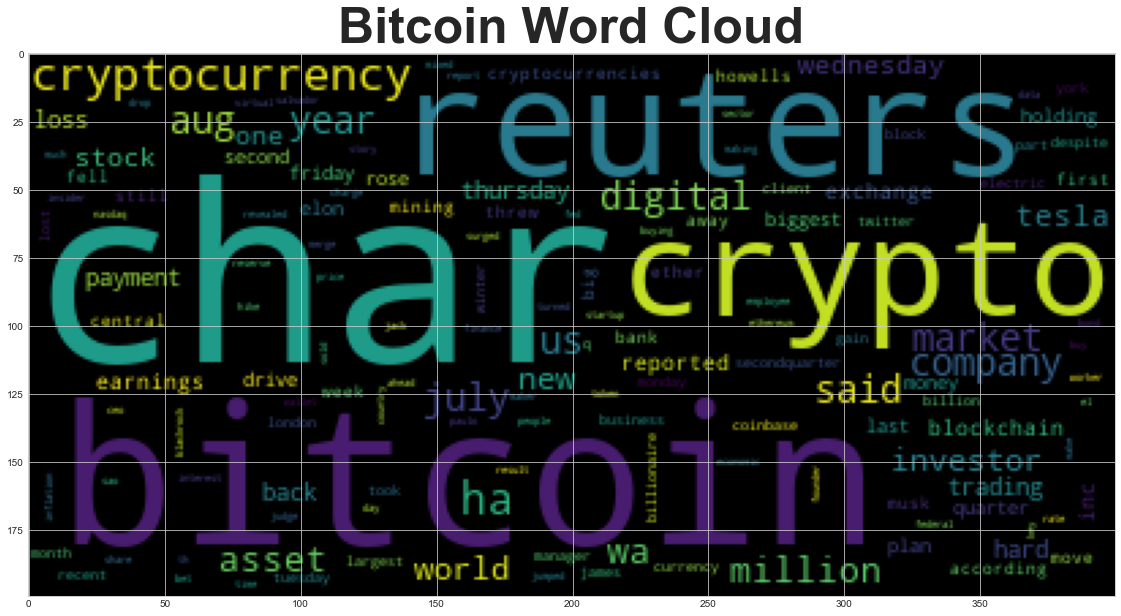

In [39]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

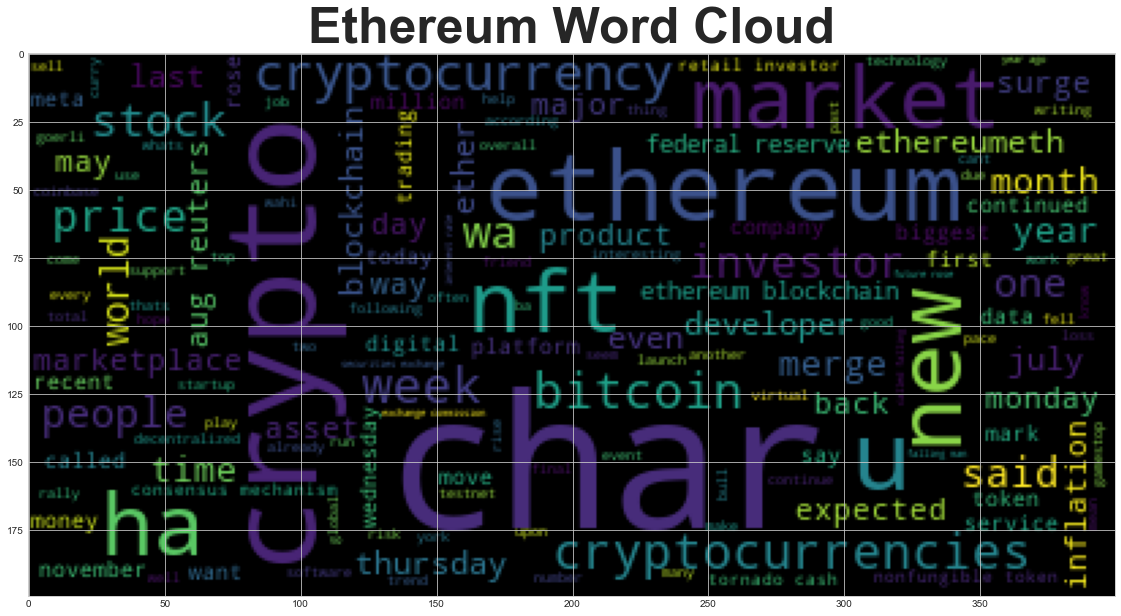

In [40]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [24]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(Bitcoin_df['Text'])

In [50]:
# Run the NER processor on all of the text
doc= nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [51]:
# Render the visualization
displacy.render(doc, style='ent')

In [52]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

8:45 in the morning TIME
June 13 DATE
Bill Stewart PERSON
Maine GPE
Dynamics Mining ORG
+3472 PERSON
the last several years DATE
millions CARDINAL
one CARDINAL
UK GPE
mans NORP
Every year DATE
Belgium GPE
the University of Cambridges Bitcoin Electricity Consump ORG
Elon Musk-owned PERSON
Tesla ORG
Bitcoin PERSON
Q2 LAW
Reuters ORG
6.85% PERCENT
22,717.05 MONEY
22:05 GMT TIME
Wednesday DATE
1,457.27 MONEY
29.1% PERCENT
weeks DATE
+17 PERSON
2021 DATE
Tesla ORG
$936 million MONEY
the second quarter of 2022 DATE
Bitcoin PERSON
75 CARDINAL
24,000 MONEY
first ORDINAL
August DATE
US GPE
this week DATE
as much as 4% PERCENT
24,191 MONEY
19 CARDINAL
Reuters ORG
Friday DATE
three-week DATE
2 CARDINAL
Reuters ORG
a good month DATE
months DATE
more than 17% PERCENT
July DATE
October DATE
July 30 DATE
Reuters ORG
3.36% PERCENT
24,584.24 MONEY
1707 DATE
GMT ORG
Saturday DATE
798.93 MONEY
39.7% PERCENT
the year DATE
2022 DATE
Q2 earnings LAW
Wednesday DATE
Elon Musks ORG
$2.3 billion MONEY
second-qu

---

### Ethereum NER

In [56]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(Ethereum_df['Text'])

In [57]:
# Run the NER processor on all of the text
doc= nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"


In [59]:

# Render the visualization
displacy.render(doc, style='ent')

In [60]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Every year DATE
Belgium GPE
the University of Cambridges Bitcoin Electricity Consump ORG
NFT ORG
Instagram ORG
May DATE
NF ORG
The Securities and Exchange Commission ORG
11 CARDINAL
Less than two weeks DATE
GameStops ORG
NFT ORG
2014 DATE
Merge PERSON
second ORDINAL
Ethereum GPE
Vitalik Buterin PERSON
Thursday DATE
the Ethereum Community Conference ORG
Paris GPE
8 CARDINAL
Reuters ORG
Zipmex ORG
Ethereum PERSON
Bitcoin PERSON
this week DATE
Monday DATE
60% PERCENT
Vivaldi PERSON
Jon von Tetzchner PERSON
the last month DATE
Ethereum 2.0 FAC
second ORDINAL
The US Treasury Department's ORG
Office of Foreign Asset Control ORG
Monday DATE
North Korean NORP
Ameri ORG
as much as 75% PERCENT
JPMorgan ORG
Monday DATE
36% PERCENT
102% PERCENT
mid-June DATE
Europe LOC
one CARDINAL
Mangnall PERSON
November 2021 DATE
Joe Hovde PERSON
New York GPE
July 30 DATE
Reuters ORG
3.36% PERCENT
24,584.24 MONEY
1707 DATE
GMT ORG
Saturday DATE
798.93 MONEY
39.7% PERCENT
the year DATE
Reuters ORG
6.85% PERCENT


---